In [1]:
from shared.preface import *
import shared.functions as fct
import shared.my_units as my
import shared.control_center as CC

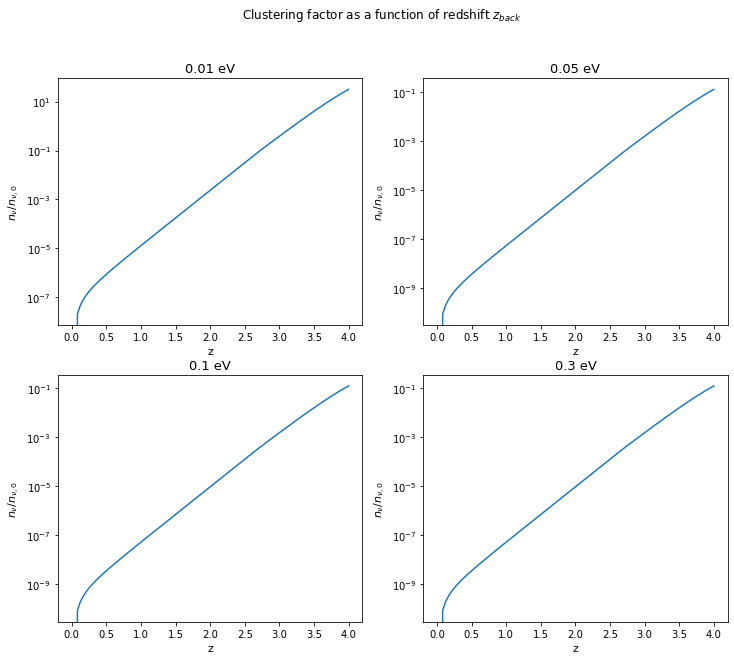

In [2]:
def n_nu_of_redshift(m_nu_eV):

    # Amount of simulated neutrinos
    Ns = np.arange(CC.NR_OF_NEUTRINOS, dtype=int)

    # load initial and final velocity
    u0 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[0][3:6] for Nr in Ns]
    u1 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[-1][3:6] for Nr in Ns]

    # magnitude of velocities
    m0 = np.array([np.sqrt(np.sum(u**2)) for u in np.array(u0)])
    m1 = np.array([np.sqrt(np.sum(u**2)) for u in np.array(u1)])

    # convert mass(es) from eV to kg
    m_nu_kg = m_nu_eV.to(unit.kg, unit.mass_energy())

    z_array = np.linspace(CC.Z_START, CC.Z_STOP, CC.Z_AMOUNT)

    n_nus = np.zeros(len(z_array))
    for i, z in enumerate(z_array):

        # convert velocities to momenta
        cf = m_nu_kg.value
        p0 = m0 * cf
        p1 = m1 * cf

        #NOTE: number_density function needs input momenta in units [kg*kpc/s]
        p_unit = unit.kg*unit.kpc/unit.s
        n_nus[i] = fct.number_density(p0[:i]*p_unit, p1[:i]*p_unit, z).value

    np.save(f'neutrino_data/number_densities_at_z_{m_nu_eV.value}eV.npy', n_nus)


z_array = np.linspace(CC.Z_START, CC.Z_STOP, CC.Z_AMOUNT)

fig, axs = plt.subplots(2,2, figsize=(12,10))
fig.suptitle(r'Clustering factor as a function of redshift $z_{back}$')

masses = np.array([0.01, 0.05, 0.1, 0.3])*unit.eV
for j, m in enumerate(masses):
    n_nu_of_redshift(m)

    n_nus = np.load('neutrino_data/number_densities_at_z_0.05eV.npy')

    i = 0
    if j in (2,3):
        i = 1
        j -= 2

    axs[i,j].semilogy(z_array, n_nus/56)
    axs[i,j].set_title(f'{m.value} eV')
    axs[i,j].set_xlabel('z')
    axs[i,j].set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')

plt.savefig('check_plots/figure_4.pdf')
plt.show()

In [3]:
n = 1

# convert n from eV**3 to 1/cm**3
eV_to_mneg1 = (1/1.97327e-7)
n_m3 = n * eV_to_mneg1**3 * (1/unit.m**3)
n_cm3 = n_m3.to(1/unit.cm**3)

print(n_cm3)

130148887506900.61 1 / cm3


In [4]:
n = 1

n_m3 = n * 806554.8154**3 / unit.m**3
n_cm3 = n_m3.to(1/unit.cm**3)

print(n_cm3)

524688644651.4362 1 / cm3


In [5]:
t1 = (1/const.h/const.c).to(1/unit.cm/unit.eV)
print(t1)

8065.543937349209 1 / (cm eV)


In [17]:
# conversion factor for limits
m = 0.3*unit.eV
cf = my.T_nu_eV.to(unit.J) / m.to(unit.kg, unit.mass_energy()) / const.c

# limits on velocity
lower = 0.01 * cf.to(my.Uunit)
upper = 10 * cf.to(unit.km/unit.s)

print(lower, upper)

5.4419732577172953e-17 kpc / s 1679.21748804138 km / s
